In [658]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import helper7 as hp

In [659]:
step_size = 0.1
data = pd.read_csv("wdbc.csv")
X = data.drop(['0'], axis=1).values
scaler = preprocessing.StandardScaler().fit(X) # scaling  element  
X = scaler.transform(X)## scaling transformation
YD = data[["0"]].values 
YL =[]
for i in YD:                      ## replacing M by 1 and B by 0
    if i == "M":
        YL.append(1)
    else:
        YL.append(0)
Y = np.asarray(YL)
Y = np.reshape(Y, (len(Y),1))
x_train = X[1:500]              ## Deviding data into train and test datasets
x_test = X[500:]

y_train = Y[1:500]
y_test = Y[500:]

In [660]:
#### Gradient Descent############
###
###   PART B
###
################################
Beta = np.random.rand(11,1)
num_steps = 1000
step_size = 0.2
loss_list = []

for i in range(num_steps):
    w =  hp.activation_sigmoid(hp.logits(Beta,x_train)) ## check out the helper.py to look 
    loss  = hp.neg_log_likely(y_train,w)                ## at the functions
    grad =  hp.gradient(x_train,y_train,w)
    Beta -= step_size*grad
    loss_list.append(loss)

    
    
print (Beta)

[[ 0.82020604]
 [ 1.73442809]
 [ 1.45786697]
 [ 1.88254282]
 [ 1.3438129 ]
 [-0.11768541]
 [ 0.96871997]
 [ 1.17854944]
 [ 0.37499829]
 [-0.2744173 ]
 [ 0.82114086]]


In [661]:
pred = hp.predict_binary(Beta,x_test,0.5) ## hp is from the helper.py, check it out 
hp.accuracy(y_test,pred, j =0)  ############ in the repository 

0.8840579710144928

C:\Users\ashut\Desktop\SDS 385\Exercise_1\helper7.py:59: RuntimeWarning: invalid value encountered in log
  l = -(np.nan_to_num(np.dot(y.transpose(), np.log(w))) + np.nan_to_num(np.dot((1-y).transpose(), np.log(1-w))))


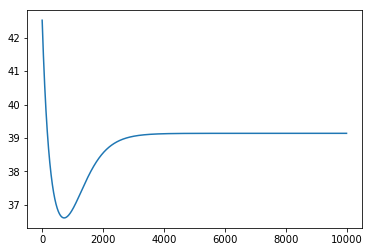

In [662]:
## Newton's Method


#######################
##
##      PART D
##
######################

num_steps = 10000
step_size = 1
loss_list = []
counter =  []
Beta = np.random.rand(11,1)
for i in range(num_steps):
    counter.append(i)
    w =  hp.activation_sigmoid(hp.logits(Beta,x_train)) +1e-5
    loss  = hp.neg_log_likely(y_train,w)
    pre_grad =  hp.gradient(x_train,y_train,w)
    grad = np.linalg.pinv(hp.hessian(Beta, x_train),rcond=1e-15).dot( pre_grad)## using linag.pinv to avoid singularity
    Beta -= step_size*grad
    loss_list.append(loss)

plt.plot(counter,loss_list)
plt.show()





In [663]:
pred = hp.predict_binary(Beta,x_test,0.5)
hp.accuracy(y_test,pred, j =0)

0.9130434782608695